In [1]:
from solinv.environment import InvariantEnvironment
from solinv.tyrell.interpreter import InvariantInterpreter
from solinv.tyrell import spec as S
from solinv.tyrell import dsl as D

from solinv.tyrell.dsl.utils import derive_dfs, get_hole_dfs

ModuleNotFoundError: No module named 'solinv'

In [ ]:
spec = S.parse_file("./dsls/abstract0.tyrell")
start_type = spec.get_type("Expr")
builder = D.Builder( spec )
interpreter = InvariantInterpreter()

In [3]:
config = {
    "spec": spec,
    "start_type": start_type,
    "max_step": 10,
    "contract_path": "../SolidTypes/test/regression/good/mint_MI.sol",
    "solc_version": "0.5.17",
    "interpreter": interpreter
}
env = InvariantEnvironment(config=config)

In [6]:
len(env.action_list)

11

In [4]:
import json

In [8]:
env.contract_slim_ast

[[{'arguments': [{'operator': '!=',
     'leftExpression': ('<IDENTIFIER>', 'account'),
     'rightExpression': 'number'}],
   'expression': 'require'},
  {'arguments': [{'operator': '>=',
     'leftExpression': {'operator': '+',
      'leftExpression': ('<IDENTIFIER>', '_totalSupply'),
      'rightExpression': ('<IDENTIFIER>', 'value')},
     'rightExpression': ('<IDENTIFIER>', '_totalSupply')}],
   'expression': 'require'},
  {'operator': '=',
   'leftHandSide': ('<IDENTIFIER>', '_totalSupply'),
   'rightHandSide': {'operator': '+',
    'leftExpression': ('<IDENTIFIER>', '_totalSupply'),
    'rightExpression': ('<IDENTIFIER>', 'value')}},
  {'operator': '=',
   'leftHandSide': {'baseExpression': ('<IDENTIFIER>', '_balances'),
    'indexExpression': ('<IDENTIFIER>', 'account')},
   'rightHandSide': {'operator': '+',
    'leftExpression': {'baseExpression': ('<IDENTIFIER>', '_balances'),
     'indexExpression': ('<IDENTIFIER>', 'account')},
    'rightExpression': ('<IDENTIFIER>', 'valu

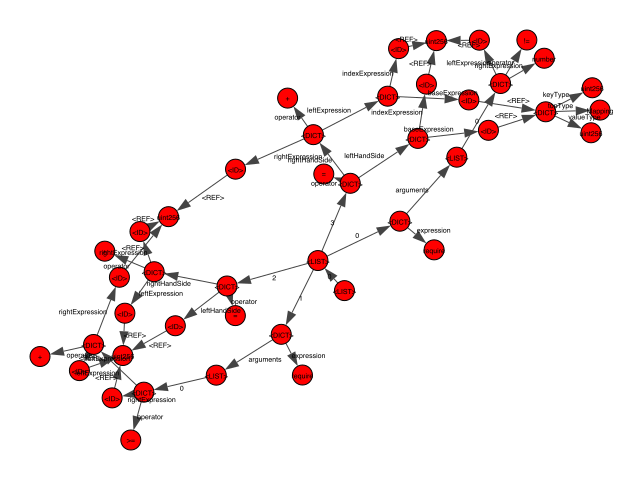

In [6]:
from igraph import *
dt = env.contract_igraph
for p in dt.vs:
    p["label_size"]=7
for p in dt.es:
    p["label_size"]=7
visual_style = {}
visual_style["margin"]=40
visual_style["bbox"]=(640,480)
visual_style["vertex_label"] = [
    "{}".format(dt.vs["token"][i]) 
    for i in range(len(dt.vs))
]
visual_style["edge_label"] = [
    ("{}".format(dt.es["token"][i]))[:]
    for i in range(len(dt.es))
]
plot(dt, **visual_style)